In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def CTE_EVAL(FILENAME):
    #Data you want to extract from the TMA file
    index,time,temp_soll,temp_ist,CurrentLength = [],[],[],[],[]
        
    #Opening the file and storing all lines in list b1.    
    f1 = open(FILENAME,'r')
    b1 = f1.readlines()
    f1.close() 
     
    #Identify the line numbers relevant for the data extraction        
    Anfang = b1.index('Kurvenwerte:\n')+3   
    Ende = b1.index('Resultate:\n')-3 
     
    #Go through the lines and store the data in the corresponding lists
    for k in range(len(b1)):        
        if k > Anfang and k <= Ende:
            '''Reformatting of txt-file lines --> Exchanging comma 
            with dots and split line content into pieces'''
            b1new =b1[k].replace(',','.')
            DATA = b1new.strip().split('        ') 
            
            #Storing the data to the empty lists created above
            index.append(DATA[0])
            time.append(float(DATA[1]))
            temp_ist.append(float(DATA[2]))
            temp_soll.append(float(DATA[3]))
            CurrentLength.append(float(DATA[4]))
    #The initial thickness of your specimen can be important
    
    initialthickness = CurrentLength[0]
    
    strain = []
    
    for l in CurrentLength:
        strain.append( (l-initialthickness)/initialthickness)
    
            
    return [time, temp_ist, temp_soll, CurrentLength, strain]

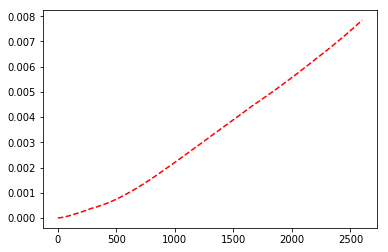

In [5]:
#Read the Data from the Textfile

Datafiles = ['Thickness_SH.txt','Transverse1_SH.txt','Transverse2_SH.txt']

ExperimentDATA = CTE_EVAL(Datafiles[0])
#content of ExperimentDATA is [time,temp_ist,temp_soll,CurrentLength]


#plt.plot(ExperimentDATA[0],ExperimentDATA[1])
#plt.plot(ExperimentDATA[0],ExperimentDATA[2],'r--')

#length
#plt.plot(ExperimentDATA[0],ExperimentDATA[3],'r--')

#strain
plt.plot(ExperimentDATA[0],ExperimentDATA[4],'r--')
plt.show(True)